This notebook has the analysis of the diaphragm pump used in the Molten Aluminum Snout Coating System.
Pump- VEVOR 39.6 Gallon Aluminum Air-operated double diaphragm pump:
    *Max Temperature: 150 degrees Fahrenheit
    *Max Pressure: 120 psi
    *Max Flow Rate: 39.6 GPM
    *Max Head Lift: 275.6 ft/84 m
    *Inlet/Outlet Port Size: 1 inch
    *Air Inlet Size: FNPT 1/2 inch
    *Average Air Consumption: 38 CFM
    *Self-Priming Dry: 3 m (10 ft)
    *Self-Priming Wet: 4.6 m (15 ft)

The manufacturer does not provide performance graphs for the pump but provided the next information:
Double diaphragm pumps typically have performance curves that show flow rate as a function of:    *
Inlet air pressure (typically 20 to 120 psi / 1.4 to 8.3 bar)    *

Diaphragm size and stroke (in this case, probably 1" or 1.5    *).

Fluid viscosity (affects actual flow rate).

Estimated example (for a 1" BNDD or si    *ilar):

At 60 psi: ~25-30 GPM (95-1    * L/min).

At 100 psi: ~35-40 GPM (13

Performance (Water Flow)    *
At 60 psi of air: Moves about 25-30 gallons per minute (like filling two large buckets every 10 seconds).    *

At 100 psi of air: Increases to about 35-40 gallons per minute (faster, but uses more air.

Note: If you use thick liquids (like oil), the flow will be l

Air Consumption (Energy Consumption)    *
Requires about 20-25 CFM (cubic feet per minute) of compressed air.

Example: If you use it with a 6 kW compressor (like those used in workshops), it will work fine.ower.-150 L/min).

This notebook aims to generate the graphs theoretically with the information provided. 
Density Calculationmize}

We use the volume-weighted average density formula:

\begin{equation}
    \rho_{\text{new}} = \frac{m_1 + m_2}{V_1 + V_2}
\end{equation}

Since mass is given by \( m = \rho \times V \), and equal volumes of both fluids are mixed (\( V_1 = V_2 = V \)), we substitute:

\begin{equation}
    \rho_{\text{new}} = \frac{\rho_1 V + \rho_2 V}{V + V}
\end{equation}

\begin{equation}
    = \frac{(1.2V) + (1.0V)}{2V}
\end{equation}

\begin{equation}
    = \frac{2.2V}{2V} = 1.1 \textn}

\textbf{Final Answer:} The new density of xture is **1.1 g/cm³**.







Flow rate is expected that flow rate will increase as pressure increases. Through some research, the trend of this relationship is not necessaraly linear but quadratic. Based on the data points that the manufacturer provided 

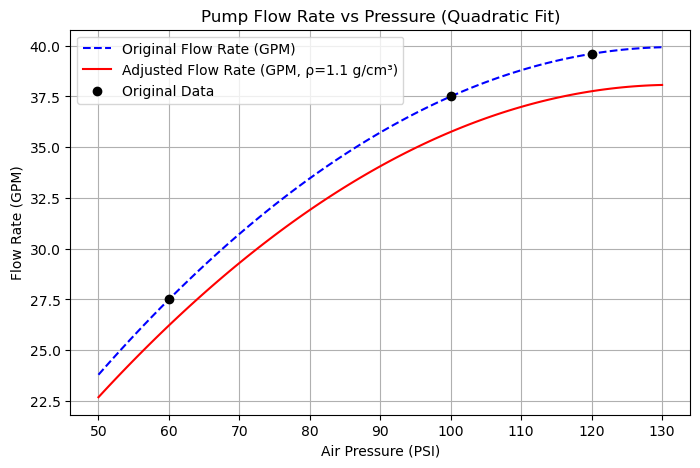

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Given Data
pressures = np.array([60, 100, 120])  # PSI
flow_rates = np.array([27.5, 37.5, 39.6])  # GPM
air_consumption = np.array([22.5, 31, 38])  # CFM

# Fit a quadratic model to flow vs pressure
coeffs = np.polyfit(pressures, flow_rates, 2)  # Quadratic fit (aP^2 + bP + c)
quadratic_fit = np.poly1d(coeffs)

# Generate smooth curve for plotting
pressure_range = np.linspace(50, 130, 100)
flow_fitted = quadratic_fit(pressure_range)

# Adjust flow for density change (density = 1.1 g/cm³)
density_factor = np.sqrt(1.0 / 1.1) # Efficiency reduction factor
flow_adjusted = flow_fitted * density_factor

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(pressure_range, flow_fitted, label="Original Flow Rate (GPM)", linestyle="--", color="blue")
plt.plot(pressure_range, flow_adjusted, label="Adjusted Flow Rate (GPM, ρ=1.1 g/cm³)", color="red")
plt.scatter(pressures, flow_rates, color="black", label="Original Data", zorder=3)
plt.xlabel("Air Pressure (PSI)")
plt.ylabel("Flow Rate (GPM)")
plt.title("Pump Flow Rate vs Pressure (Quadratic Fit)")
plt.legend()
plt.grid(True)
plt.show()


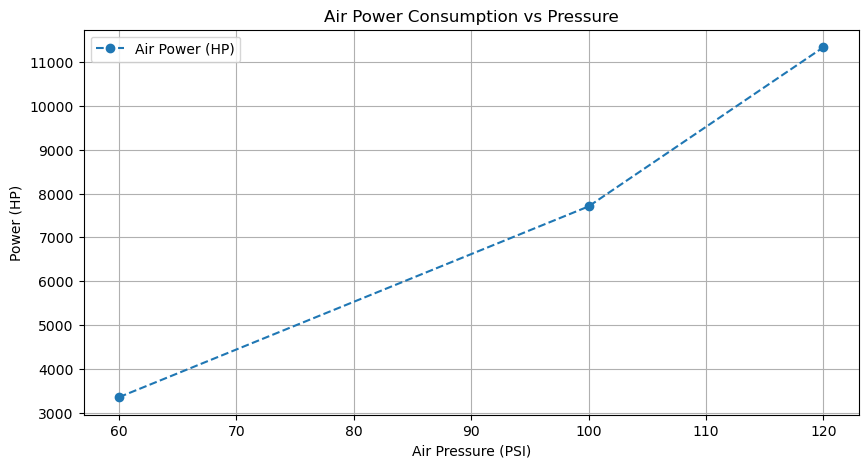

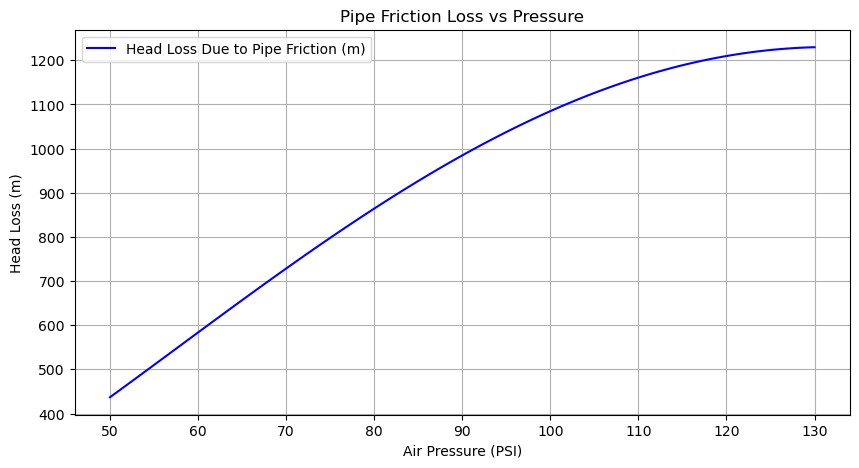

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Given Data
pressures = np.array([60, 100, 120])  # PSI
flow_rates = np.array([27.5, 37.5, 39.6])  # GPM
air_consumption = np.array([22.5, 31, 38])  # CFM
compressor_efficiency = 0.70  # Assumed efficiency

# Convert pressure to Pascals (1 PSI = 6894.76 Pa)
pressures_Pa = pressures * 6894.76

# Convert flow rates to m³/s (1 GPM = 0.00006309 m³/s)
flow_rates_m3s = flow_rates * 0.00006309

# Quadratic Fit for Flow vs Pressure
coeffs = np.polyfit(pressures, flow_rates, 2)
quadratic_fit = np.poly1d(coeffs)
pressure_range = np.linspace(50, 130, 100)
flow_fitted = quadratic_fit(pressure_range)

# Adjust flow rate for higher density (1.1 g/cm³)
density_factor = np.sqrt(1.0 / 1.1)
flow_adjusted = flow_fitted * density_factor

# Calculate Air Power Consumption (HP)
air_power = (pressures * air_consumption * 1.74) / compressor_efficiency  # HP

# Pipe Friction Loss using Darcy-Weisbach Equation
D = 0.0254  # Pipe diameter (1 inch = 0.0254 m) 
L = 32  # Pipe length  
rho = 1100  # Fluid density (1.1 g/cm³ = 1100 kg/m³)
mu = 0.007  # Dynamic viscosity 
g = 9.81  # Gravity (m/s²)

# Velocity Calculation
velocity = (flow_fitted * 0.00006309) / (np.pi * (D / 2) ** 2)

# Reynolds Number Calculation
Re = (rho * velocity * D) / mu

# Colebrook Equation for friction factor (implicit equation)
def colebrook(f, Re, D):
    return 1 / np.sqrt(f) + 2 * np.log10((D / (3.7 * D)) + (2.51 / (Re * np.sqrt(f))))

# Solve for f using fsolve
friction_factors = np.array([fsolve(colebrook, 0.02, args=(Re[i], D))[0] for i in range(len(Re))])

# Darcy-Weisbach Head Loss
hf = (friction_factors * L * velocity**2) / (D * 2 * g)

plt.figure(figsize=(10, 5))
plt.plot(pressures, air_power, marker="o", linestyle="--", label="Air Power (HP)")
plt.xlabel("Air Pressure (PSI)")
plt.ylabel("Power (HP)")
plt.title("Air Power Consumption vs Pressure")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(pressure_range, hf, label="Head Loss Due to Pipe Friction (m)", color="blue")
plt.xlabel("Air Pressure (PSI)")
plt.ylabel("Head Loss (m)")
plt.title("Pipe Friction Loss vs Pressure")
plt.legend()
plt.grid(True)
plt.show()
